<a href="https://colab.research.google.com/github/miragasko/ml/blob/main/supervised/02_regression/03_linear_regression_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
np.random.seed(42)
np.set_printoptions(precision=6,suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'1.6.1'

In [52]:
# data generating

In [53]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (100, 1)
target shape: (100,)


In [54]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [55]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

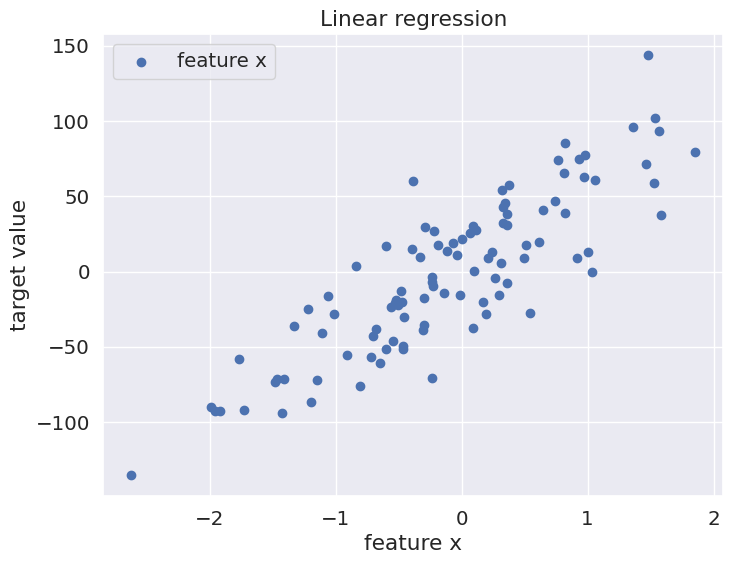

In [56]:
plt.figure(figsize=(8,6))
plt.title('Linear regression')
plt.xlabel('feature x')
plt.ylabel('target value')
plt.scatter(data, target, label='feature x')
plt.legend()
plt.plot()

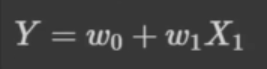

In [57]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

#method fit() fits linear model to data
regressor.fit(data, target)

LinearRegression()

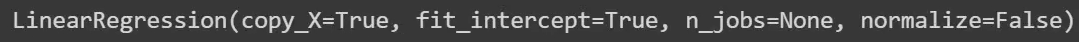

In [58]:
# score() evaluates the model on the provided data (result R2 score)
regressor.score(data, target)

0.7426670084336404

In [59]:
# we have trained the model
# predict() method makes a prediction based on model
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

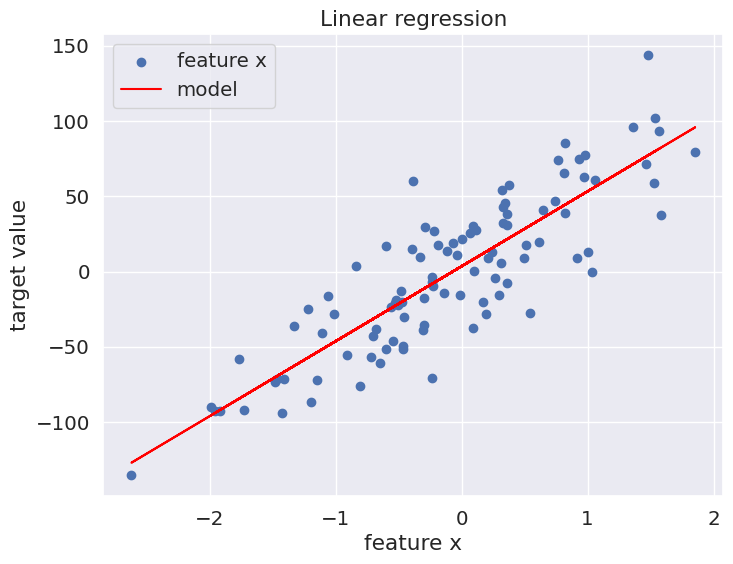

In [60]:
plt.figure(figsize=(8,6))
plt.title('Linear regression')
plt.xlabel('feature x')
plt.ylabel('target value')
plt.scatter(data, target, label='feature x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

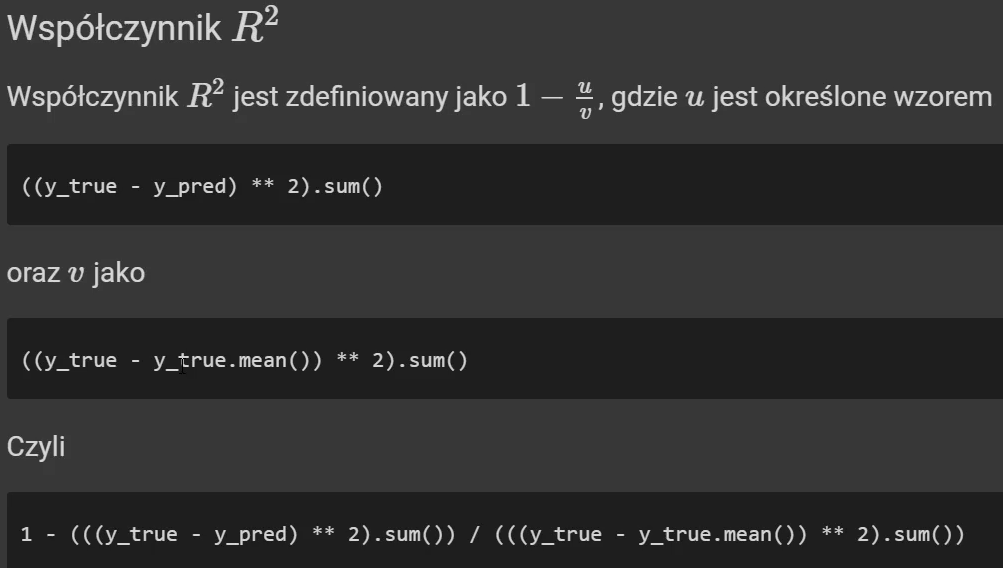

In [61]:
#((y_true - y_pred) ** 2).sum()
#((y_true - y_true.mean()) ** 2).sum()
# 1 - (((y_true - y_pred) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum() )

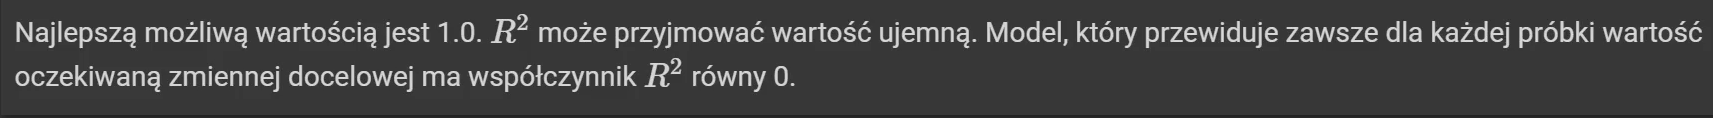

In [62]:
regressor.score(data, target)

0.7426670084336404

In [63]:
[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

In [64]:
regressor.coef_

array([49.83])

In [65]:
regressor.intercept_

3.4953459615809184

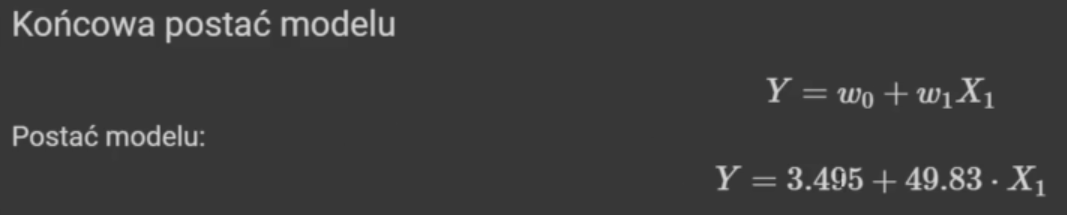

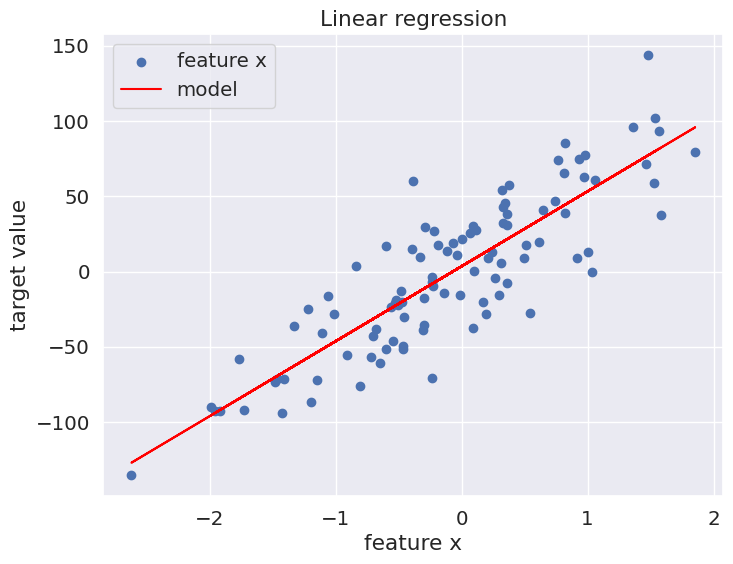

In [66]:
plt.figure(figsize=(8,6))
plt.title('Linear regression')
plt.xlabel('feature x')
plt.ylabel('target value')
plt.scatter(data, target, label='feature x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

## Regression - split dataset to training and testing

In [67]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [69]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)


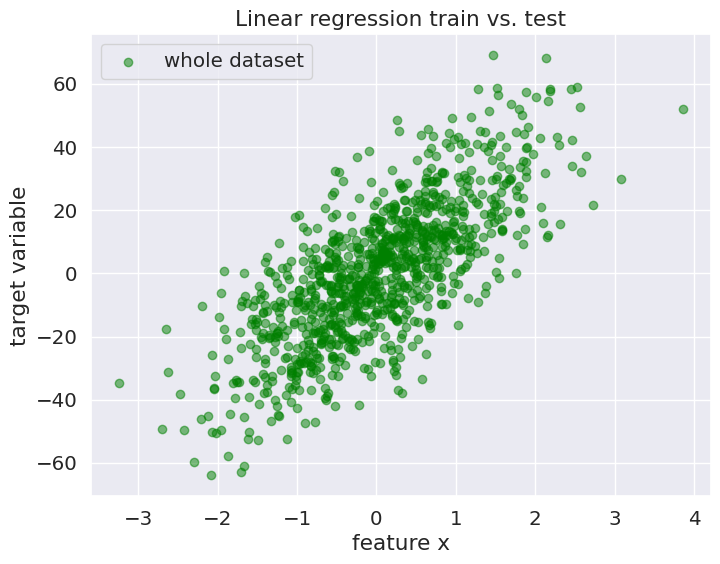

In [70]:
plt.figure(figsize=(8, 6))
plt.title('Linear regression train vs. test')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(data, target, label='whole dataset', color='green', alpha=0.5)
plt.legend()
plt.plot();

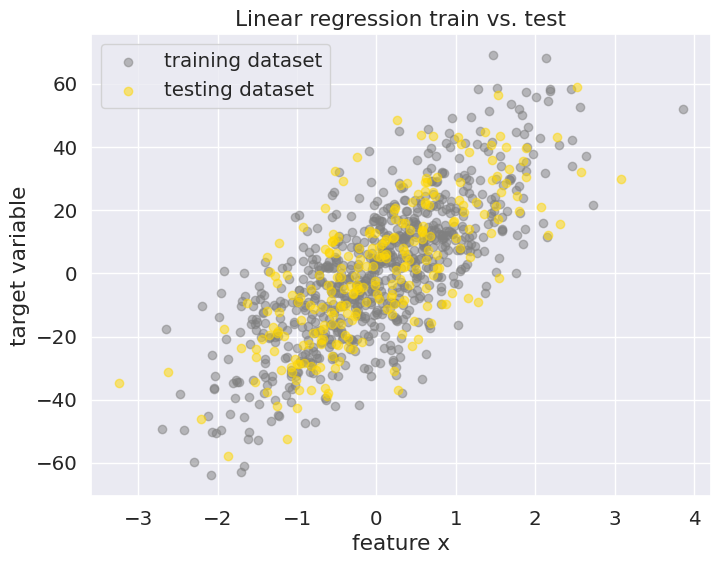

In [71]:
plt.figure(figsize=(8, 6))
plt.title('Linear regression train vs. test')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='training dataset', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='testing dataset', color='gold', alpha=0.5)
plt.legend()
plt.plot();

In [72]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
regressor.score(X_train, y_train)

0.5550440098049001

In [74]:
(regressor.intercept_ , regressor.coef_[0])

(0.047775428476506565, 16.77810981036426)

In [75]:
reg1 = regressor.score(X_train, y_train)

In [76]:
regressor.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([16.78]),
 'rank_': 1,
 'singular_': array([26.75]),
 'intercept_': 0.047775428476506565}

In [77]:
regressor.score(X_test, y_test)

0.5108438585354155

In [78]:
(regressor.intercept_ , regressor.coef_[0])

(0.047775428476506565, 16.77810981036426)

In [79]:
#dir(regressor)

In [80]:
help(regressor.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, whe

#Linear regression = training dataset - visualization

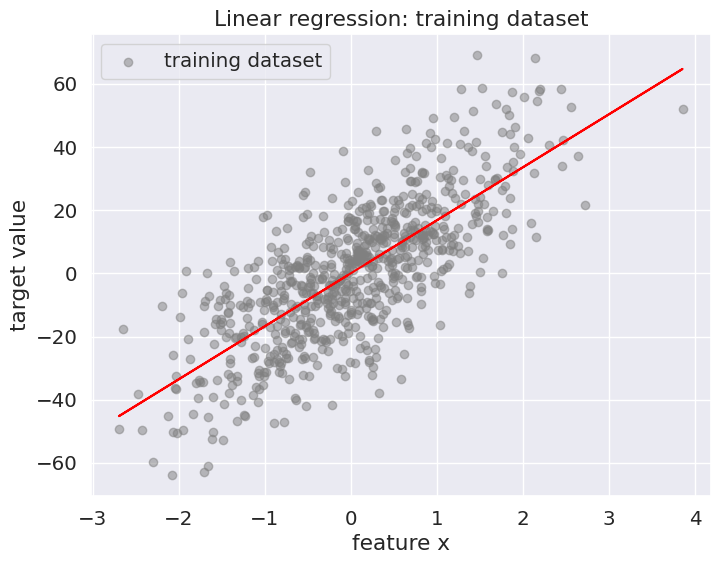

In [81]:
plt.figure(figsize=(8,6))
plt.title('Linear regression: training dataset')
plt.xlabel('feature x')
plt.ylabel('target value')
plt.scatter(X_train, y_train, label='training dataset', color='gray', alpha=0.5)
plt.plot(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.show()

In [82]:
(regressor.intercept_ + regressor.coef_[0] * X_train)[:5]

array([[2.92],
       [6.04],
       [-5.36],
       [11.56],
       [-22.36]])

#Linear regression = testing dataset - visualization

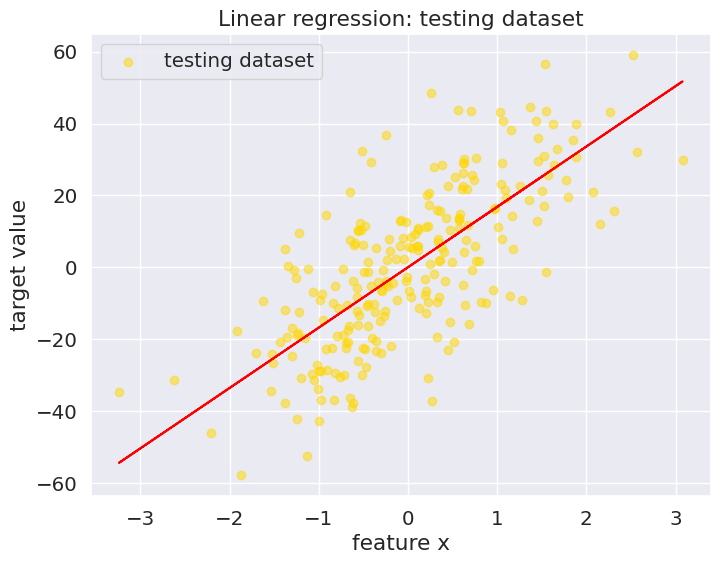

In [83]:
plt.figure(figsize=(8,6))
plt.title('Linear regression: testing dataset')
plt.xlabel('feature x')
plt.ylabel('target value')
plt.scatter(X_test, y_test, label='testing dataset', color='gold', alpha=0.5)
plt.plot(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.show()

#Prediction based on the model

In [87]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head(6)

,y_true,y_pred
0,30.876983,25.601338
1,1.850537,5.954600
2,30.604981,31.624589
3,-9.092543,-16.490844
4,-36.311708,-10.800495
5,-6.501501,3.345593


In [88]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,30.876983,25.601338,5.275646
1,1.850537,5.954600,-4.104063
2,30.604981,31.624589,-1.019608
3,-9.092543,-16.490844,7.398301
4,-36.311708,-10.800495,-25.511212


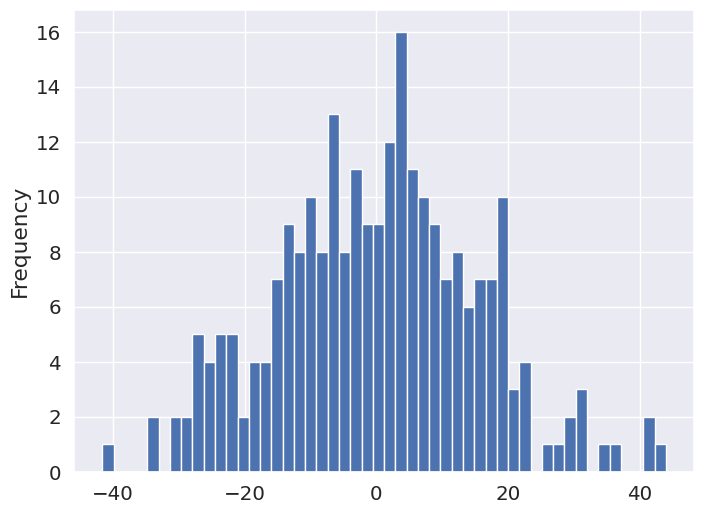

In [89]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8,6))